<div align="center">
<h1>Protocolo BB84</h1>
<h3>Entendendo a Base da Criptografia Quântica</h3>

<br>

Guilherme Moraes Pagani<sup>1</sup>, Júlia Victoria Santos<sup>2</sup>, Kauê Miziara<sup>3</sup>

guilhermemoraespagani@gmail.com<sup>1</sup>, juliasantos7652@gmail.com<sup>2</sup>, kauemiziara@gmail.com<sup>3</sup>
</div>

<div hidden>
    $$\\renewcommand{\\ket}[1]{\\left|{#1}\\right\\rangle}$$
    $$\\renewcommand{\\bra}[1]{\\left\\langle{#1}\\right|}$$
    $$\\renewcommand{\\braket}[2]{\\left\\langle{#1}\\middle|{#2}\\right\\rangle}$$
</div>

# Índice

[1. Introdução](#1-introdução)

- [1.1 Diferenças entre a Computação Clássica e a Computação Quântica](#11-diferenças-entre-a-computação-clássica-e-a-computação-quântica)

- [1.2 Superposição](#12-superposição)

- [1.3 Entrelaçamento Quântico](#13-entrelaçamento-quântico)

[2. Resumo de Criptografia Clássica](#2-resumo-de-criptografia-clássica)

- [2.1 Introdução à Criptografia](#21-introdução-à-criptografia)

- [2.2 Criptografia Simétrica Clássica](#22-criptografia-simétrica-clássica)

- [2.3 O problema da criptografia simétrica](#23-o-problema-da-criptografia-simétrica)

[3. Protocolo BB84 para Distribuir Chaves de Forma Segura](#3-protocolo-bb84-para-distribuir-chaves-de-forma-segura)

- [3.1 Teorema da Não-Clonagem](#31-teorema-da-não-clonagem)

- [3.2 Etapas do Protocolo](#32-etapas-do-protocolo)

- - [3.2.1 Envio](#321-envio)

- - [3.2.2 Medição](#322-medição)

- - [3.2.3 Filtragem](#323-filtragem)

- - [3.2.4 Eve, a Espiã](#324-eve-a-espiã)

- - [3.2.5 Reconciliação](#325-reconciliação)

[4. O Protocolo na Prática](#4-o-protocolo-na-prática)

- [4.1 Protocolo sem Espião](#41-protocolo-sem-espião)

- - [4.1.1 Setup](#411-setup)

- - [4.1.2 Circuito](#412-circuito)

- - [4.1.3 Simulação](#413-simulação)

- [4.2 Protocolo com Espião](#42-protocolo-com-espião)

- - [4.2.1 Setup](#421-setup)

- - [4.2.2 Ação da Espiã](#422-ação-da-espiã)

- - [4.2.3 Detecção da Espiã](#423-detecção-da-espiã)

[5. Conclusão](#5-conclusão)

[6. Referências](#6-referências)

Primeiramente, vamos garantir que as bibliotecas necessárias estão instaladas:

In [ ]:
%pip install numpy
%pip install ipywidgets
%pip install matplotlib
%pip install qiskit
%pip install qiskit-aer
%pip install pylatexenc

<a id="1-introdução"></a>
# 1. Introdução 

A segurança da informação na era digital depende intrinsecamente da criptografia simétrica. Sistemas amplamente utilizados, como o <a href="https://www.ibm.com/br-pt/think/topics/symmetric-encryption" target="_blank">**Advanced Encryption Standard**</a> (AES), baseiam-se na segurança através da geração de chaves aleatórias. Embora extremamente robustos frente à computação clássica, esses sistemas tornam-se vulneráveis diante dos avanços da computação quântica, especialmente devido ao <a href="https://quantum.cloud.ibm.com/learning/en/courses/fundamentals-of-quantum-algorithms/grover-algorithm/introduction" target="_blank">**Algoritmo de Grover**</a>, capaz de acelerar ataques de força bruta e reduzir a segurança das chaves simétricas.

Diante do exposto, o presente notebook apresenta uma proposta desenvolvida para o Hackathon do Qiskit Fall Fest 2025 organizado pela equipe da UFABC. O grupo propõe a apresentação dos fundamentos do **Protocolo BB84**, proposto por **Bennette** e **Brassard** em 1984, abordando seu funcionamento e principais aplicações.

Como parte integrante do relatório, realiza-se uma introdução conceitual à computação clássica em contraposição à computação quântica, destacando conceitos essenciais para a compreensão de qualquer algoritmo quântico, tais como superposição e entrelaçamento, que serão discutidos posteriormente.

Além disso, considerando que o Protocolo BB84 utiliza princípios da mecânica quântica para garantir a segurança na troca de chaves criptográficas, torna-se indispensável apresentar uma breve explicação sobre a criptografia clássica. Essa contextualização permite ao leitor compreender de maneira mais sólida o papel e a relevância do BB84 dentro do cenário da segurança da informação e da comunicação quântica.

<a id="11-diferenças-entre-a-computação-clássica-e-a-computação-quântica"></a>
## 1.1 Diferenças entre a Computação Clássica e a Computação Quântica

O paradigma da **Computação Clássica** é construído sobre a lógica binária e a unidade fundamental de informação conhecida como **bit** (dígito binário). A implementação física do bit é baseada em estados de dispositivos eletrônicos, como <a href="https://pt.wikipedia.org/wiki/Trans%C3%ADstor" targer="_blank">**transistores**</a>.

Em um circuito digital:

- **Presença de Tensão:** a presença de uma tensão elétrica (tipicamente $+5\text{V}$ ou $+3.3\text{V}$ em circuitos lógicos) em um determinado ponto, ou trilha, é designada como o estado lógico **1** (“Ligado” ou _True_).
- **Ausência de tensão:** a ausência de tensão, ou uma tensão próxima de $0\text{V}$, é designada como o estado lógico **0** (“Desligado” ou _False_).

O bit é, portanto, uma variável que pode assumir apenas um de dois estados mutuamente exclusivos em um dado instante: 0 ou 1. 

Toda a capacidade de processamento, armazenamento de dados e execução de software na computação clássica resulta de combinações sequenciais dessas unidades binárias.

Em contraste, a **Computação Quântica** utiliza os princípios da Mecânica Quântica para resolver problemas nos quais a física e a computação clássicas não conseguem atuar de forma eficiente. A principal divergência entre ambas está em sua unidade fundamental de informação: na computação quântica, utiliza-se o **qubit** (_quantum bit_).

Por meio de princípios quânticos, o qubit é capaz de existir em **superposição de estados**, ou seja, representar simultaneamente os estados 0 e 1.

<a id="12-superposição"></a>
## 1.2 Superposição

Ao contrário do bit clássico, que só pode ter o valor **0** ou **1**, o **qubit** pode estar em uma mistura dos dois ao mesmo tempo, algo que chamamos de **superposição**. Na Mecânica Quântica isso significa que, se um qubit pode existir em diferentes estados, o estado do sistema é uma combinação de _todos_ os possíveis ao mesmo tempo. 

Na Figura 1, esse conceito é ilustrado pelo famoso experimento do <a href="https://www.ifsc.usp.br/~strontium/Teaching/Material2018-2%20SFI5707%20MecanicaquanticaB/Monografia%20-%20Pedro%20-%20SchroedingerCat.pdf" target="_blank">**Gato de Schrödinger**</a>. Nesse experimento mental, o gato dentro de uma caixa é descrito como estando **vivo e morto ao mesmo tempo**, até que alguém observe o que realmente aconteceu. 

Da mesma forma, um qubit só assume, ou “decide”, o valor clássico **0** ou **1** no momento em que é medido.

<div align="center">
<div align="center">
  <img width="620" alt="Representação do experimento do Gato de Schrödinger." src="./img/superposicao.png"/>
</div>


<p align="center">
  <strong>Fig. 1:</strong> Ilustração do experimento mental do Gato de Schrödinger. 
</p>
<p align="center">Fonte: os Autores.
</div>

Matematicamente, o estado de um qubit $|\psi\rangle$ é descrito como:

$$
|\psi\rangle = \alpha |0\rangle + \beta |1\rangle
$$

onde:

- $|0\rangle$ e $|1\rangle$ representam os **estados de base ortogonais** (análogos aos bits clássicos 0 e 1);  
- $\alpha$ e $\beta$ são **amplitudes de probabilidade complexas**, que indicam a probabilidade de encontrar o sistema nos estados $|0\rangle$ ou $|1\rangle$ após uma medição.  

A restrição imposta pela Mecânica Quântica exige que a soma das probabilidades seja unitária, ou seja:

$$
|\alpha|^2 + |\beta|^2 = 1
$$

Essa restrição garante que temos $100\%$ de chances de medir _algum_ resultado, dentre os estados possíveis.

O estado em superposição existe apenas enquanto o qubit não é observado. Quando fazemos a medição, o qubit deixa de estar em múltiplos estados ao mesmo tempo e passa a ter um único valor: **0** ou **1**, com probabilidades dadas por $|\alpha|^2$ e $|\beta|^2$, respectivamente.

<a id="13-entrelaçamento-quântico"></a>
## 1.3 Entrelaçamento Quântico

O **Entrelaçamento Quântico** é um fenômeno fundamental da Mecânica Quântica, no qual duas ou mais partículas passam a se comportar de forma correlacionada, constituindo um único estado compartilhado, como retratado na figura 2. 

Mesmo que estejam separadas por grandes distâncias, o que acontece com uma influencia imediatamente a outra.

<div align="center">
  <img src="img/entrelacamento.png" alt="Representação de um estado entrelaçado" width="420">
</div>

<p align="center"><strong>Fig. 2:</strong> Representação de duas partículas entrelaçadas.</p>
<p align="center">Fonte: Os Autores.</p>


Quando duas partículas estão entrelaçadas, como exemplo **Partícula A** e a **Partícula B**, elas formam um único sistema compartilhado. Isso quer dizer que não dá para descrever o estado de uma delas sem levar em conta o estado da outra.

Matematicamente, isso significa que o estado total não pode ser separado em partes independentes, como mostra a expressão abaixo:

$$
|\Psi_{\text{entrelaçado}}\rangle \neq |\psi_A\rangle \otimes |\psi_B\rangle
$$

A principal característica do entrelaçamento é essa conexão instantânea entre as partículas:

- **Dependência mútua:** Saber o estado de uma partícula (por exemplo, a **Partícula A**) faz com que automaticamente saibamos o estado da outra (**Partícula B**), não importa a distância entre elas.

- **Medições sincronizadas:** Por consequência, se **Alice** e **Bob** compartilham partículas em um estado entrelaçado, quando **Alice** mede sua partícula, a de **Bob** é medida no mesmo instante, mesmo que não seja diretamente manipulada.

Esse fenômeno mostra o que chamamos de <a href="https://pt.wikipedia.org/wiki/N%C3%A3o_localidade" target="_blank">**não localidade quântica**</a>, algo que desafia a forma como entendemos o mundo clássico.

<a id="2-resumo-de-criptografia-clássica"></a>
# 2. Resumo de Criptografia Clássica

<a id="21-introdução-à-criptografia"></a>
## 2.1 Introdução à Criptografia

A criptografia é um modo de desenvolver e usar algoritmos que codificam informações para protegê-las de terceiros, de modo que apenas aqueles com permissão devem poder descriptografar e ler a informação compartilhada. 

Derivada da palavra grega *"κρυπτός"* (*"kryptos"*), que significa "oculto", a criptografia é traduzida como "escrita oculta", na prática, ela é usada para transformar mensagens ilegíveis em legíveis para apenas aqueles que possuem a **chave**. 

Mas o que é essa chave? Na criptografia, ela é um valor secreto usado para codificar ou decodificar informações, garantindo que apenas quem possui acesso à chave possa ler ou escrever as informações criptografadas, mantendo um canal de comunicação. 

Essa chave poder ser **simétrica**, quando é a mesma chave para as duas pessoas do canal de comunicação, ou **assimétrica** que possui pares de chaves pública e privada para cada um.

<a id="22-criptografia-simétrica-clássica"></a>
## 2.2 Criptografia Simétrica Clássica 

Na criptografia simétrica, tanto o remetente da mensagem quanto o receptor compartilham da mesma chave para codificar e decodificar uma mensagem e manter o canal de comunicação seguro de terceiros. 

Um exemplo clássico da criptografia simétrica é a **Cifra de César**, utilizada pelo Imperador romano, que reorganiza as letras de uma frase baseado em um deslocamento das letras do alfabeto. O algoritmo é simples: 

- 1° Passo: escolher a chave (valor do deslocamento).
- 2° Passo: identificar a posição de cada letra no alfabeto.
- 3° Passo: substituir a letra original pela nova, deslocada.

<div align="center" style="
  background-color: #fdecd7;
  border: 2px solid #7b755e;
  border-radius: 10px;
  padding: 15px 25px;
  margin: 15px auto;
  width: fit-content;
  box-shadow: 0 4px 10px rgba(0,0,0,0.1);
  font-family: 'Segoe UI', sans-serif;
  font-size: 16px;
  color: #000;
">
  <b>É importante notar que, se a chave ou a letra deslocada ultrapassar "Z", reiniciamos o alfabeto (retornamos ao "A").</b>
</div>

Assim, para criptografar a palavra "GATO" usando a chave 3, teremos: 

- G -> J
- A -> D
- T -> W
- O -> R 

Portando, "GATO" seria "**JDWR**". 

<div align='center'>
<img src='./img/cesar.png' alt="Representação de um estado entrelaçado" width="320"/>
</div>
<p align="center"><strong>Fig. 3:</strong> Representação da cifra de César.</p>
<p align="center">Fonte: Os Autores.</p>
Por ser um algoritmo trivial, desenvolvemos o código Python abaixo para ilustrar a Cifra de César.

In [2]:
import ipywidgets as widgets

In [3]:
# Cifra de César 

# Criptografando uma palavra
def caesar_encrypting(key, word): 
    alphabet = 'abcdefghijklmnopqrstuvwyzàáãâéêóôõíúçABCDEFGHIJKLMNOPQRSTUVWYZÀÁÃÂÉÊÓÕÍÚÇ'
    encrypted_word = ''
    for i in word:
        index = alphabet.find(i)
        if index == -1:
            encrypted_word += i
        else: 
            new_index = index + key
            new_index = new_index % len(alphabet)
            encrypted_word += alphabet[new_index:new_index+1]
    return encrypted_word

In [4]:
cipher_key = widgets.IntSlider(
    value=3,
    min=0,
    max=30,
    step=1,
    description="Chave",
    style={
        'description_width': '100px',
        'handle_color': '#ffdaa1',
    },
    layout=widgets.Layout(width='1400px', height='100px'),
)

# Cor da barra, texto e tamanho da fonte
slider_style = """
<style>
.custom-slider .widget-label {
    color: black !important;
    font-weight: bold;
    font-size: 30px;
}
.custom-slider .widget-readout {
    color: black !important;
    font-weight: bold;
    font-size: 30px;
}
.custom-slider .slider-bar {
    background-color: #dbd2c7 !important;
}
</style>
"""

<div align="center" style="
  background-color: #fdecd7;
  border: 2px solid #7b755e;
  border-radius: 10px;
  padding: 15px 25px;
  margin: 15px auto;
  width: fit-content;
  box-shadow: 0 4px 10px rgba(0,0,0,0.1);
  font-family: 'Segoe UI', sans-serif;
  font-size: 16px;
  color: #000;
">
  <b>Caso o slider não renderizar corretamente, por favor execute novamente a célula a seguir.</b>
</div>

In [5]:
display(widgets.HTML(slider_style))
cipher_key.add_class("custom-slider")
display(cipher_key)

HTML(value='\n<style>\n.custom-slider .widget-label {\n    color: black !important;\n    font-weight: bold;\n …

IntSlider(value=3, description='Chave', layout=Layout(height='100px', width='1400px'), max=30, style=SliderSty…

In [6]:
word = "GATO"
print(f'A palavra "{word}" criptografada é "{caesar_encrypting(cipher_key.value, word)}"')

A palavra "GATO" criptografada é "JDWR"


In [7]:
# Descriptografando uma palavra

def caesar_decrypting(key, word):
    alphabet = 'abcdefghijklmnopqrstuvwyzàáãâéêóôõíúçABCDEFGHIJKLMNOPQRSTUVWYZÀÁÃÂÉÊÓÕÍÚÇ'
    decrypted_word = ''
    for i in word:
        index = alphabet.find(i)
        if index == -1:
            decrypted_word += i
        else: 
            new_index = index - key
            new_index = new_index % len(alphabet)
            decrypted_word += alphabet[new_index:new_index+1]
    return decrypted_word

In [8]:
decipher_key = widgets.IntSlider(
    value=3,
    min=0,
    max=30,
    step=1,
    description="Chave",
    style={
        'description_width': '100px',
        'handle_color': '#ffdaa1',
    },
    layout=widgets.Layout(width='1400px', height='100px'),
)

In [9]:
display(widgets.HTML(slider_style))
decipher_key.add_class("custom-slider")
display(decipher_key)

HTML(value='\n<style>\n.custom-slider .widget-label {\n    color: black !important;\n    font-weight: bold;\n …

IntSlider(value=3, description='Chave', layout=Layout(height='100px', width='1400px'), max=30, style=SliderSty…

In [10]:
word = "JDWR"
print(f'A palavra "{word}" descriptografada é "{caesar_decrypting(decipher_key.value, word)}"')

A palavra "JDWR" descriptografada é "GATO"


Perceba que os dois algoritmos são praticamente iguais, mas na descriptografia subtraímos o índice do alfabeto para achar o valor correto. 

Embora hoje não se usa o algoritmo da Cifra de César em projetos industriais e reais, ele demonstra perfeitamente a a criptografia simétrica, pois tanto para descriptografar quanto para criptografar uma palavra, é necessário que ambas as partes saibam o valor exato da chave.

Incentivamos você a realizar testes com as funções acima, para perceber como a mensagem muda se o valor da chave for diferente para cada lado (criptografando e descriptografando).

<a id="23-o-problema-da-criptografia-simétrica"></a>
## 2.3 O problema da criptografia simétrica 

A principal vantagem da criptografia simétrica sobre a assimétrica é a simplicidade para desenvolver e resolver chaves, o que a torna mais veloz também. No entanto, a criptografia simétrica é considerada menos segura, pois depende da troca de chaves de modo seguro. 

<div align="center" style="
  background-color: #fdecd7;
  border: 2px solid #7b755e;
  border-radius: 10px;
  padding: 15px 25px;
  margin: 15px auto;
  width: fit-content;
  box-shadow: 0 4px 10px rgba(0,0,0,0.1);
  font-family: 'Segoe UI', sans-serif;
  font-size: 16px;
  color: #000;
">
  <b>Qualquer pessoa que obtenha a chave simétrica pode acessar os dados sem que as partes principais do canal de comunicação saibam.</b>
</div>

Considere um sistema com inicialmente 2 usuários, Alice e Bob, que desejam se comunicar usando criptografia simétrica, mas um espião consegue acesso à chave de criptografia que Alice e Bob definiram. Após a criptografia da mensagem de Alice, o espião consegue captar a mensagem criptografada sem que Alice nem Bob saibam que há um espião.

Como bits clássicos podem ser copiados, o espião intercepta a mensagem criptografada e envia uma cópia para Bob. Por ter a chave, pode descriptografar a mensagem facilmente, enquanto Alice e Bob não têm como desconfiar de sua presença.

O problema pode ser interpretado pela imagem na figura 4: 

<div align="center">
  <img src="./img/msgsimetrica.png" alt="Comunicação de Alice e Bob com um espião" width="720">
</div>

<p align="center"><strong>Fig. 4:</strong> Representação da comunicação da Alice e Bob com um espião. 
</p>
<p align="center">Fonte: Os Autores.</p>

Além do mais, avanços tecnológicos em Inteligência Artificial e Computação Quântica ameaçam cada vez mais sistemas simétricos.

<a id="3-protocolo-bb84-para-distribuir-chaves-de-forma-segura"></a>
# 3. Protocolo BB84 para Distribuir Chaves de Forma Segura
 
O protocolo BB84, criado por **Charles Bennett** e **Gilles Brassard** em **1984** (daí o seu nome), utiliza propriedades da mecânica quântica para fazer uma criptografia completamente segura. 

<div align="center" style="
  background-color: #fdecd7;
  border: 2px solid #7b755e;
  border-radius: 10px;
  padding: 15px 25px;
  margin: 15px auto;
  width: fit-content;
  box-shadow: 0 4px 10px rgba(0,0,0,0.1);
  font-family: 'Segoe UI', sans-serif;
  font-size: 16px;
  color: #000;
">
  <b>É importante entender que BB84 não é de fato um algoritmo de criptografia quântica, e sim um protocolo para troca segura de chaves.</b>
</div>

Esse protocolo permite que duas partes (Alice e Bob) gerem uma chave em comum sem a necessidade de um canal secreto estabelecido. É padrão, após completar o protocolo quântico, usar algum algoritmo de criptografia clássico para troca de mensagens. 

É bem evidente que qualquer informação clássica pode ser copiada, porém, as leis da mecânica quântica nos dizem que é **impossível** copiar uma informação **quântica**, segundo o *teorama da não-clonagem*. Ou seja, não é possível nem mesmo obter informação sobre um estado quântico genérico sem que interfira em todo o sistema. 

Podemos citar ainda, o *Princípio da Incerteza de Heisenberg*, um dos pilares da mecânica quântica, que nos diz que é impossível conhecer com precisão a posição e o momento (velocidade) de uma partícula ao mesmo tempo; essas incertezas são aproveitadas na criptografia quântica. 

<a id="31-teorema-da-não-clonagem"></a>
## 3.1 Teorema da Não-Clonagem

O Teorema da Não-Clonagem é uma regra fundamental da Mecânica Quântica que diz que não é possível copiar perfeitamente um estado quântico desconhecido. Ou seja, não existe nenhuma máquina ou processo físico capaz de criar uma cópia idêntica de um qubit se não soubermos exatamente qual é o seu estado. 

Esse resultado foi demonstrado em 1982 por **Wootters**, **Zurek** e **Dieks**. Em suma, o teorema demonstra que seria impossível existir um tipo de “máquina de xerox quântica” que pudesse pegar um estado $|\psi\rangle$ qualquer e fazer uma cópia exata dele.

Se isso fosse possível, o processo seria representado por:

$$
U\left(|\psi\rangle \otimes |\mathrm{E}\rangle\right) = |\psi\rangle \otimes |\psi\rangle
$$

onde:

- $|\psi\rangle$ é o estado original (o qubit que queremos copiar);
- $|\mathrm{E}\rangle$ seria um qubit vazio, pronto para receber a cópia;
- $U$ representaria o funcionamento da máquina de clonagem.

O teorema prova que esse operador $U$ não pode existir. A demonstração baseia-se na suposição de que a máquina deve funcionar para quaisquer dois estados quânticos distintos, $|\psi\rangle$ e $|\phi\rangle$, onde $\langle \psi | \phi \rangle \neq 0$ (ou seja, estados não ortogonais).

O Teorema da Não-Clonagem impõe restrições severas à manipulação da informação quântica:

- **Não duplicação:** um estado quântico desconhecido não pode ser copiado. O único processo possível para “obter” o estado de um qubit é através da medição, o que, pelo [**Princípio da Incerteza**](https://pt.wikipedia.org/wiki/Princ%C3%ADpio_da_incerteza_de_Heisenberg), destrói o estado de superposição original e fornece apenas uma informação parcial e probabilística.

- **Implicações para a medição:** a impossibilidade de clonagem é a razão pela qual não se pode “inspecionar” um qubit para determinar seu estado exato sem perturbá-lo. O ato de medição projeta o estado em uma base, destruindo a informação contida em outras bases, tornando impossível replicar o estado original se a base for desconhecida.

Essa restrição fundamental da natureza é o que confere poder aos protocolos de comunicação quântica, pois permite que a própria tentativa de acesso à informação seja um evento físico detectável.

<a id="32-etapas-do-protocolo"></a>
## 3.2 Etapas do Protocolo

O protocolo pode ser dividido em algumas etapas, que envolvem a definição da chave por Alice e Bob, mais uma verificação da existência de uma parte espiã, Eve.

Consideraremos o protocolo em condições ideais, em canais sem ruídos ou erros de medição.

<a id="321-envio"></a>
### 3.2.1 Envio

Na primeira etapa, Alice envia uma sequência de bits para Bob, que serão utilizados como chave. 

Esses bits são enviados através de *fótons* (partículas de luz), que podem estar polarizados de duas formas (*"bases"*):
- Retilínea ($+$): os fótons estão polarizados em $0°$ (vertical) ou $90°$ (horizontal).
- Diagonal ($\times$): os fótons são polarizados em $45°$ ou $135°$ (equivalente a $-45°$).

Computacionalmente, associamos valores lógicos para esses fótons. Para tal, Alice precisa codificar os bits que deseja enviar utilizando as bases de polarização escolhidas, de forma que:
- O bit clássico $0$ é representado por um qubit no estado
- - $|0\rangle$, se usarmos a base $+$;
- - $|+\rangle$, se usarmos a base $\times$;
- O bit clássico $1$ é representado por um qubit no estado
- - $|1\rangle$, se usarmos a base $+$;
- - $|-\rangle$, se usarmos a base $\times$;

Os estados $\ket{+}$ e $\ket{-}$ são estados importantes para a computação, representando uma superposição com $50\%$ de chances de resultar em $0$ ou $1$ quando medidos na base retilínea:

$$\ket{+}=\frac{1}{\sqrt 2}\left(\ket{0}+\ket{1}\right)$$

$$\ket{-}=\frac{1}{\sqrt 2}\left(\ket{0}-\ket{1}\right)$$

Essas bases são importantes pois medir um qubit na mesma base que foi polarizado gera o resultado original. Porém, medí-lo na base errada gera um resultado completamente aleatório, fato que será usado durante o protocolo.

Para ilustrar esta etapa, veja a seguinte tabela mostrando a sequência de bits que Alice deseja enviar, as bases escolhidas e o qubit enviado para Bob:

<div align="center">

<table style="border-collapse: collapse; text-align: center; border: 1px solid #161616; border-radius: 10px; box-shadow: 0 0 10px rgba(0,0,0,0.1); color: #000;">
  <tbody style="color: #000;">
    <tr>
      <td style="padding: 8px; border: 1px solid #000; background-color: #e6c194;">Bits de Alice</td>
      <td style="border: 1px solid #000; background-color: #fdecd7;">1</td>
      <td style="border: 1px solid #000; background-color: #fdecd7;">0</td>
      <td style="border: 1px solid #000; background-color: #fdecd7;">1</td>
      <td style="border: 1px solid #000; background-color: #fdecd7;">1</td>
      <td style="border: 1px solid #000; background-color: #fdecd7;">0</td>
      <td style="border: 1px solid #000; background-color: #fdecd7;">0</td>
      <td style="border: 1px solid #000; background-color: #fdecd7;">1</td>
      <td style="border: 1px solid #000; background-color: #fdecd7;">0</td>
    </tr>
    <tr>
      <td style="padding: 8px; border: 1px solid #000; background-color: #e6c194;">Bases de Alice</td>
      <td style="border: 1px solid #000; background-color: #fdecd7;">+</td>
      <td style="border: 1px solid #000; background-color: #fdecd7;">&times;</td>
      <td style="border: 1px solid #000; background-color: #fdecd7;">+</td>
      <td style="border: 1px solid #000; background-color: #fdecd7;">&times;</td>
      <td style="border: 1px solid #000; background-color: #fdecd7;">&times;</td>
      <td style="border: 1px solid #000; background-color: #fdecd7;">+</td>
      <td style="border: 1px solid #000; background-color: #fdecd7;">+</td>
      <td style="border: 1px solid #000; background-color: #fdecd7;">&times;</td>
    </tr>
    <tr>
      <td style="padding: 8px; border: 1px solid #000; background-color: #e6c194;">Qubit Enviado</td>
      <td style="border: 1px solid #000; background-color: #fdecd7;">|1&rang;</td>
      <td style="border: 1px solid #000; background-color: #fdecd7;">|+&rang;</td>
      <td style="border: 1px solid #000; background-color: #fdecd7;">|1&rang;</td>
      <td style="border: 1px solid #000; background-color: #fdecd7;">|-&rang;</td>
      <td style="border: 1px solid #000; background-color: #fdecd7;">|+&rang;</td>
      <td style="border: 1px solid #000; background-color: #fdecd7;">|0&rang;</td>
      <td style="border: 1px solid #000; background-color: #fdecd7;">|1&rang;</td>
      <td style="border: 1px solid #000; background-color: #fdecd7;">|+&rang;</td>
    </tr>
  </tbody>
</table>

</div>

<a id="322-medição"></a>
### 3.2.2 Medição

Bob recebe os qubits enviados por Alice, sem saber os bits originais nem as bases que ela usou. Para tentar descobrir quais bits ela enviou, Bob escolhe uma base aleatória para medir cada fóton polarizado.

É necessário que a base em que Bob faz a medição seja a mesma que Alice enviou o bit, se não, a informação que Bob terá será diferente da que Alice queria transmitir. Por exemplo, se Alice envia um qubit no estado $\ket{+}$ (bit $0$ na base $\times$) e Bob medir na base retilínea ($+$), ele obterá os resultados $0$ ou $1$ de forma imprevisível. Se medir na base $\times$, porém, terá sempre o resultado correto.

Para ilustrar esta etapa, vamos continuar o exemplo da tabela anterior, mostrando a escolha de bases de Bob e os bits clássicos medidos. Os bits medidos na base correta estão destacados em **negrito**, enquanto exemplificamos os medidos na base errada com uma escolha aleatória entre $0$ e $1$.

<div align="center">

<table style="border-collapse: collapse; text-align: center; border: 1px solid #161616; border-radius: 10px; box-shadow: 0 0 10px rgba(0,0,0,0.1); color: #000;">
  <tbody style="color: #000;">
    <tr>
      <td style="padding: 8px; border: 1px solid #000; background-color: #e6c194;">Bits de Alice</td>
      <td style="border: 1px solid #000; background-color: #fdecd7;">1</td>
      <td style="border: 1px solid #000; background-color: #fdecd7;">0</td>
      <td style="border: 1px solid #000; background-color: #fdecd7;">1</td>
      <td style="border: 1px solid #000; background-color: #fdecd7;">1</td>
      <td style="border: 1px solid #000; background-color: #fdecd7;">0</td>
      <td style="border: 1px solid #000; background-color: #fdecd7;">0</td>
      <td style="border: 1px solid #000; background-color: #fdecd7;">1</td>
      <td style="border: 1px solid #000; background-color: #fdecd7;">0</td>
    </tr>
    <tr>
      <td style="padding: 8px; border: 1px solid #000; background-color: #e6c194;">Bases de Alice</td>
      <td style="border: 1px solid #000; background-color: #fdecd7;">+</td>
      <td style="border: 1px solid #000; background-color: #fdecd7;">&times;</td>
      <td style="border: 1px solid #000; background-color: #fdecd7;">+</td>
      <td style="border: 1px solid #000; background-color: #fdecd7;">&times;</td>
      <td style="border: 1px solid #000; background-color: #fdecd7;">&times;</td>
      <td style="border: 1px solid #000; background-color: #fdecd7;">+</td>
      <td style="border: 1px solid #000; background-color: #fdecd7;">+</td>
      <td style="border: 1px solid #000; background-color: #fdecd7;">&times;</td>
    </tr>
    <tr>
      <td style="padding: 8px; border: 1px solid #000; background-color: #e6c194;">Qubit Enviado</td>
      <td style="border: 1px solid #000; background-color: #fdecd7;">|1&rang;</td>
      <td style="border: 1px solid #000; background-color: #fdecd7;">|+&rang;</td>
      <td style="border: 1px solid #000; background-color: #fdecd7;">|1&rang;</td>
      <td style="border: 1px solid #000; background-color: #fdecd7;">|-&rang;</td>
      <td style="border: 1px solid #000; background-color: #fdecd7;">|+&rang;</td>
      <td style="border: 1px solid #000; background-color: #fdecd7;">|0&rang;</td>
      <td style="border: 1px solid #000; background-color: #fdecd7;">|1&rang;</td>
      <td style="border: 1px solid #000; background-color: #fdecd7;">|+&rang;</td>
    </tr>
    <tr>
      <td style="padding: 8px; border: 1px solid #000; background-color: #e6c194;">Bases de Bob</td>
      <td style="border: 1px solid #000; background-color: #fdecd7;">+</td>
      <td style="border: 1px solid #000; background-color: #fdecd7;">+</td>
      <td style="border: 1px solid #000; background-color: #fdecd7;">&times;</td>
      <td style="border: 1px solid #000; background-color: #fdecd7;">&times;</td>
      <td style="border: 1px solid #000; background-color: #fdecd7;">+</td>
      <td style="border: 1px solid #000; background-color: #fdecd7;">+</td>
      <td style="border: 1px solid #000; background-color: #fdecd7;">&times;</td>
      <td style="border: 1px solid #000; background-color: #fdecd7;">&times;</td>
    </tr>
    <tr>
      <td style="padding: 8px; border: 1px solid #000; background-color: #e6c194;">Bits de Bob</td>
      <td style="border: 1px solid #000; background-color: #fdecd7;"><strong>1</strong></td>
      <td style="border: 1px solid #000; background-color: #fdecd7;">1</td>
      <td style="border: 1px solid #000; background-color: #fdecd7;">0</td>
      <td style="border: 1px solid #000; background-color: #fdecd7;"><strong>1</strong></td>
      <td style="border: 1px solid #000; background-color: #fdecd7;">1</td>
      <td style="border: 1px solid #000; background-color: #fdecd7;"><strong>0</strong></td>
      <td style="border: 1px solid #000; background-color: #fdecd7;">0</td>
      <td style="border: 1px solid #000; background-color: #fdecd7;"><strong>0</strong></td>
    </tr>
  </tbody>
</table>

</div>

<a id="323-filtragem"></a>
### 3.2.3 Filtragem

Alice e Bob possuem chaves (chamadas de *raw key* ou chave bruta), mas por causa das medições em bases diferentes, a discrepância na sequência de bits é em média de $50\%$, mesmo sem interferência. Para que as chaves fiquem iguais, chegamos na etapa de **filtragem** (*sifting*) do protocolo. 

Essa etapa é uma comunicação pública entre as duas partes: Bob envia as bases que ele escolheu, sem revelar o resultado da medição. A partir daí, Alice informa qual polarizador ela escolheu, também sem revelar o bit original. 

Dessa forma, os dois mantêm os bits enviados/medidos com bases iguais e formam uma chave, chamada de *sifted key* ou **"chave filtrada"**. Os demais bits, medidos nas bases erradas, são descartados.

Esta etapa é essencial, mas reduz a chave bruta inicial pela metade (aproximadamente), já que o restante dos bits contêm erros das bases aleatórias que Bob escolheu. 

<div align="center" style="
  background-color: #fdecd7;
  border: 2px solid #7b755e;
  border-radius: 10px;
  padding: 15px 25px;
  margin: 15px auto;
  width: fit-content;
  box-shadow: 0 4px 10px rgba(0,0,0,0.1);
  font-family: 'Segoe UI', sans-serif;
  font-size: 16px;
  color: #000;
">
  <b>A chave que Alice transmite deve ser maior do que a chave desejada.</b>
</div>

Vamos continuar o exemplo, mostrando na tabela a formação da chave filtrada.

<div align="center">

<table style="border-collapse: collapse; text-align: center; border: 1px solid #161616; border-radius: 10px; box-shadow: 0 0 10px rgba(0,0,0,0.1); color: #000;">
  <tbody style="color: #000;">
    <tr>
      <td style="padding: 8px; border: 1px solid #000; background-color: #e6c194;">Bits de Alice</td>
      <td style="border: 1px solid #000; background-color: #fdecd7;">1</td>
      <td style="border: 1px solid #000; background-color: #fdecd7;">0</td>
      <td style="border: 1px solid #000; background-color: #fdecd7;">1</td>
      <td style="border: 1px solid #000; background-color: #fdecd7;">1</td>
      <td style="border: 1px solid #000; background-color: #fdecd7;">0</td>
      <td style="border: 1px solid #000; background-color: #fdecd7;">0</td>
      <td style="border: 1px solid #000; background-color: #fdecd7;">1</td>
      <td style="border: 1px solid #000; background-color: #fdecd7;">0</td>
    </tr>
    <tr>
      <td style="padding: 8px; border: 1px solid #000; background-color: #e6c194;">Bases de Alice</td>
      <td style="border: 1px solid #000; background-color: #fdecd7;">+</td>
      <td style="border: 1px solid #000; background-color: #fdecd7;">&times;</td>
      <td style="border: 1px solid #000; background-color: #fdecd7;">+</td>
      <td style="border: 1px solid #000; background-color: #fdecd7;">&times;</td>
      <td style="border: 1px solid #000; background-color: #fdecd7;">&times;</td>
      <td style="border: 1px solid #000; background-color: #fdecd7;">+</td>
      <td style="border: 1px solid #000; background-color: #fdecd7;">+</td>
      <td style="border: 1px solid #000; background-color: #fdecd7;">&times;</td>
    </tr>
    <tr>
      <td style="padding: 8px; border: 1px solid #000; background-color: #e6c194;">Qubit Enviado</td>
      <td style="border: 1px solid #000; background-color: #fdecd7;">|1&rang;</td>
      <td style="border: 1px solid #000; background-color: #fdecd7;">|+&rang;</td>
      <td style="border: 1px solid #000; background-color: #fdecd7;">|1&rang;</td>
      <td style="border: 1px solid #000; background-color: #fdecd7;">|-&rang;</td>
      <td style="border: 1px solid #000; background-color: #fdecd7;">|+&rang;</td>
      <td style="border: 1px solid #000; background-color: #fdecd7;">|0&rang;</td>
      <td style="border: 1px solid #000; background-color: #fdecd7;">|1&rang;</td>
      <td style="border: 1px solid #000; background-color: #fdecd7;">|+&rang;</td>
    </tr>
    <tr>
      <td style="padding: 8px; border: 1px solid #000; background-color: #e6c194;">Bases de Bob</td>
      <td style="border: 1px solid #000; background-color: #fdecd7;">+</td>
      <td style="border: 1px solid #000; background-color: #fdecd7;">+</td>
      <td style="border: 1px solid #000; background-color: #fdecd7;">&times;</td>
      <td style="border: 1px solid #000; background-color: #fdecd7;">&times;</td>
      <td style="border: 1px solid #000; background-color: #fdecd7;">+</td>
      <td style="border: 1px solid #000; background-color: #fdecd7;">+</td>
      <td style="border: 1px solid #000; background-color: #fdecd7;">&times;</td>
      <td style="border: 1px solid #000; background-color: #fdecd7;">&times;</td>
    </tr>
    <tr>
      <td style="padding: 8px; border: 1px solid #000; background-color: #e6c194;">Bits de Bob</td>
      <td style="border: 1px solid #000; background-color: #fdecd7;"><strong>1</strong></td>
      <td style="border: 1px solid #000; background-color: #fdecd7;">1</td>
      <td style="border: 1px solid #000; background-color: #fdecd7;">0</td>
      <td style="border: 1px solid #000; background-color: #fdecd7;"><strong>1</strong></td>
      <td style="border: 1px solid #000; background-color: #fdecd7;">1</td>
      <td style="border: 1px solid #000; background-color: #fdecd7;"><strong>0</strong></td>
      <td style="border: 1px solid #000; background-color: #fdecd7;">0</td>
      <td style="border: 1px solid #000; background-color: #fdecd7;"><strong>0</strong></td>
    </tr>
    <tr>
      <td style="padding: 8px; border: 1px solid #000; background-color: #e6c194;">Bases Iguais?</td>
      <td style="border: 1px solid #000; background-color: #fdecd7;"><strong>Sim</strong></td>
      <td style="border: 1px solid #000; background-color: #fdecd7;">Não</td>
      <td style="border: 1px solid #000; background-color: #fdecd7;">Não</td>
      <td style="border: 1px solid #000; background-color: #fdecd7;"><strong>Sim</strong></td>
      <td style="border: 1px solid #000; background-color: #fdecd7;">Não</td>
      <td style="border: 1px solid #000; background-color: #fdecd7;"><strong>Sim</strong></td>
      <td style="border: 1px solid #000; background-color: #fdecd7;">Não</td>
      <td style="border: 1px solid #000; background-color: #fdecd7;"><strong>Sim</strong></td>
    </tr>
    <tr>
      <td style="padding: 8px; border: 1px solid #000; background-color: #e6c194;">Sifted Key</td>
      <td style="border: 1px solid #000; background-color: #fdecd7;"><strong>1</strong></td>
      <td style="border: 1px solid #000; background-color: #fdecd7;"></td>
      <td style="border: 1px solid #000; background-color: #fdecd7;"></td>
      <td style="border: 1px solid #000; background-color: #fdecd7;"><strong>1</strong></td>
      <td style="border: 1px solid #000; background-color: #fdecd7;"></td>
      <td style="border: 1px solid #000; background-color: #fdecd7;"><strong>0</strong></td>
      <td style="border: 1px solid #000; background-color: #fdecd7;"></td>
      <td style="border: 1px solid #000; background-color: #fdecd7;"><strong>0</strong></td>
    </tr>
  </tbody>
</table>

</div>

<a id="324-eve,-a-espiã"></a>
### 3.2.4 Eve, a Espiã

Alice e Bob compartilham a chave peneirada, mas ele ainda não é segura. É necessário assegurar se existe um terceiro (a espiã Eve) interceptando a comunicação.

Assim como na criptografia clássica, Eve intercepta a mensagem de Alice e envia uma cópia para Bob para que não seja descoberta. Porém, pelo **Teorema da Não-Clonagem**, Eve não pode copiar a mensagem sem medir o sistema. Então, ela deve escolher bases aleatórias e fazer um processo similar ao de Bob. Após a medição, ela precisa codificar os bits medidos novamente, enviando para Bob qubits em superposição, fingindo ser Alice. Como suas bases são aleatórias, isso causará uma diferença ainda maior na chave bruta de Bob. 

Para detectar Eve, Alice e Bob divulgam um subconjunto aleatório da chave filtrada, a comparam e verificam a taxa de erro, chamada de **QBER** (*Quantum Bit Error Rate*), que é a porcentagem de bits na amostra que não coincidiram. 

$$
QBER = \frac{\text{número de erros}}{\text{tamanho da }\textit{sifted key}}\times 100
$$

Se a QBER for zero ou estiver abaixo de um percentual acordado previamente, eles descartam os bits utilizados na verificação e **continuam** para a próxima etapa. Se a QBER for maior que o limiar, eles identificam que há um espião e **recomeçam** o protocolo.

Continuando o exemplo nas tabelas, a chave filtrada de ambos é $1100$. Se eles utilizarem o último qubit (mais à direita) como amostra de teste, verão que ambos têm o bit **0**, calculando $QBER = 0\%$. Eles descartam esse qubit e prosseguem com o protocolo, utilizando a _chave preliminar_ $110$.

#### E se Eve tivesse interceptado a mensagem?

Supondo que ela interceptou o segundo qubit enviado por Alice ($\ket{+}$, enviado na base diagonal). Eve não sabe a base correta e mediu na base retilínea, obtendo $1$ aleatoriamente. Ela codifica esse bit na mesma base, enviando $\ket{1}$ para Bob, que também escolheu a base errada, obtendo o bit $1$ após a medição.

Novamente, nota-se que alguns bits foram perdidos nesse processo. Naturalmente, a quantidade de fótons enviados no início deve ser bem maior do que no exemplo. 

<div align="center" style="
  background-color: #fdecd7;
  border: 2px solid #7b755e;
  border-radius: 10px;
  padding: 15px 25px;
  margin: 15px auto;
  width: fit-content;
  box-shadow: 0 4px 10px rgba(0,0,0,0.1);
  font-family: 'Segoe UI', sans-serif;
  font-size: 16px;
  color: #000;
">
  <b>Como Alice e Bob usaram bases diferentes neste qubit, o resultado seria descartado para a chave peneirada e a presença e Eve não seria detectada.</b>
</div>

No entando, suponha que Eve intercepte o último qubit. Alice envia $\ket{+}$ e Eve mede na base errada, medindo $0$ na base $+$ e reenviando o estado $\ket{0}$ para Bob.

Como neste caso Bob escolheu a base correta ($\times$, como Alice), medir o estado enviado por Eve (na base errada) resultará em $\ket{-}$ em $0$ ou $1$ aleatoriamente. Se ele obtiver 1, sua chave peneirada será $110$**1**, diferente de Alice.

<div align="center" style="
  background-color: #fdecd7;
  border: 2px solid #7b755e;
  border-radius: 10px;
  padding: 15px 25px;
  margin: 15px auto;
  width: fit-content;
  box-shadow: 0 4px 10px rgba(0,0,0,0.1);
  font-family: 'Segoe UI', sans-serif;
  font-size: 16px;
  color: #000;
">
  <b>Nesse caso, QBER = 25%, evidenciando a presença de Eve.</b>
</div>


<a id="325-reconciliação"></a>
### 3.2.5 Reconciliação

Após a etapa de detecção de espionagem, Alice e Bob compartilham a **chave preliminar**, que tem altas chances de ser segura.

Em aplicações reais, devido à interferência e erros de medição, a chave ainda pode conter _pequenas discrepâncias_, mesmo na ausência de Eve. Por isso, é aplicado um pós-processamento clássico para garantir que a chave final será segura.

Após toda as etapas, Alice e Bob compartilham uma chave secreta final. Diferente de algoritmos de criptografia assimétricos, a segurança dessa chave não depende da dificuldade de um problema matemático, mas das leis da mecânica quântica.

<div align="center" style="
  background-color: #fdecd7;
  border: 2px solid #7b755e;
  border-radius: 10px;
  padding: 15px 25px;
  margin: 15px auto;
  width: fit-content;
  box-shadow: 0 4px 10px rgba(0,0,0,0.1);
  font-family: 'Segoe UI', sans-serif;
  font-size: 16px;
  color: #000;
">
  <b>Isso faz com que nem mesmo um computador quântico possa descobrir a chave, pois ele também precisaria medir qubits interceptados.</b>
</div>

<a id="4-o-protocolo-na-prática"></a>
# 4. O Protocolo na Prática

Para mostrar na prática o funcionamento do protocolo, o grupo desenvolveu o código a seguir ilustrando o passo a passo descrito nas seções anteriores, em uma situação ideal e sem ruído.

Antes de iniciar, vamos fazer as importações necessárias:

In [11]:
import numpy as np
from qiskit import QuantumCircuit
from qiskit_aer import AerSimulator

Agora, definimos a quantidade de bits que serão enviados por Alice.

Além disso, configuramos uma _seed_ para garantir que os resultados serão sempre reprodutíveis. Para um protocolo realmente aleatório, recomendamos alterar a célula abaixo.

In [12]:
### --- Configuração ---
np.random.seed(42)
NUM_BITS = 8

<a id="41-protocolo-sem-espião"></a>
## 4.1 Protocolo sem Espião

Neste primeiro momento, vamos reproduzir o protocolo passo a passo sem a interferência de um espião.

Alice enviará seus bits para Bob, que os medirá e definirá a chave filtrada sem se preocupar com a presença de Eve.

<a id="411-setup"></a>
### 4.1.1 Setup

Começamos gerando uma sequência aleatória de `NUM_BITS` bits para Alice. O método `randint(2)` escolherá aleatoriamente um número $n$ tal que $0 \leq n \le 2$, ou seja, $0$ ou $1$.

Também geramos uma sequência de bases para Alice, as quais ela utilizará para codificar os bits antes do envio. Para representar as bases melhor em código Python, vamos criar outra lista contendo apenas $0$ e $1$, interpretando **00** como a base $+$ e **1** como a base $\times$.

In [13]:
# --- Geração de sequências aleatórias para Alice ---
alice_bits  = np.random.randint(2, size=NUM_BITS)
alice_bases = np.random.randint(2, size=NUM_BITS) # 0 para base (+), 1 para base (x)

Aqui, criamos brevemente uma função auxiliar que faz o mapeamento descrito acima, apenas para deixar os `prints` mais fáceis de entender.

A função substitui valores inteiros `0` pela string `"+"`, e `1` por `"x"`.

In [14]:
base_processing_function = lambda b: "+" if b == 0 else "x"
base_processing = np.vectorize(base_processing_function)

In [15]:
print(f"Bits de Alice:\t{alice_bits}")
print(f"Bases de Alice:\t{base_processing(alice_bases)}")

Bits de Alice:	[0 1 0 0 0 1 0 0]
Bases de Alice:	['+' 'x' '+' '+' '+' '+' 'x' '+']


Após definir os bits e bases de Alice, fazemos o mesmo para gerar as bases de Bob.

In [16]:
# --- Geração de bases aleatórias para Bob ---
bob_bases = np.random.randint(2, size=NUM_BITS)

print(f"Bases de Bob:\t{base_processing(bob_bases)}")

Bases de Bob:	['x' 'x' 'x' '+' 'x' '+' 'x' 'x']


<a id="412-circuito"></a>
### 4.1.2 Circuito

Agora, implementamos o protocolo de fato. Em Qiskit, podemos fazê-lo na forma de um circuito quântico.

Nossa função geradora de circuito receberá três parâmetros, a sequência de bits sendo transmitidos, as bases do emissor (no caso, Alice) e as bases do destinatário (Bob), que fará a medição.

Para cada bit sendo enviado, criaremos um circuito, que pode ser dividido em duas seções:
- **Preparação de Alice:** cria um qubit que representa o bit clássico a ser enviado, codificando na base escolhida.
- **Medição por Bob:** recebe o qubit de Alice e o mede, considerando a base de Bob.

#### Preparação de Alice

Em circuitos do Qiskit, qubits começam sempre no estado $\ket{0}$. Portanto, se o bit a ser enviado for $0$ não precisamos fazer nada.

Caso o bit for $1$, adicionamos uma porta inversora $X$ para transformar o estado inicial em $\ket{1}$.

Após a criação do qubit, precisamos codificá-lo na base correta. A base retilínea $+$ faz o seguinte mapeamento:

$$0 \mapsto \ket{0}$$
$$1 \mapsto \ket{1}$$

Ou seja, se a base correspondente for $+$ (no caso do código, `0`), também não precisamos fazer mais nada. A base $\times$, porém, faz:

$$0 \mapsto \ket{+}$$
$$1 \mapsto \ket{-}$$

Isso representa uma rotação no estado do qubit. A porta lógica que faz uma transformação equivalente é o **operador de Hadamard** $H$:

$$H\ket{0} = \ket{+}$$
$$H\ket{1} = \ket{-}$$

Dessa forma, aplicando $H$ caso a base escolhida para determinado bit seja a diagonal (`1` no nosso código), mapearemos o bit original ao estado quântico correto.

#### Medição por Bob

Por simplicidade, Bob recebe o qubit de Alice diretamente, como parte do mesmo circuito. Assim, só precisamos aplicar sua base.

De forma similar à Alice, nós não precisamos fazer nada caso a base de Bob para determinado bit seja $+$. Porém, se for $\times$, basta aplicarmos $H$.

Por fim, adicionamos uma porta de medição. Quando executarmos a simulação do circuito, ela escolherá automaticamente um estado possível com base em suas probabilidades.

A função `create_bb84_circuit` abaixo implementa o procedimento descrito.

In [17]:
def create_bb84_circuit(
    bits: list[int],
    sender_bases: list[str],
    measurement_bases: list[str]
) -> list[QuantumCircuit]:
    """Cria um circuito para cada bit do protocolo BB84"""
    circuits = []
    num_bits = len(bits)

    for i in range(num_bits):
        qc = QuantumCircuit(1, 1, name=f"qubit_{i}")

        # --- Preparação por Alice ---
        # Se o bit de Alice é 1, aplica a porta X
        if bits[i] == 1:
            qc.x(0)
        # Se a base de Alice é X, aplica Hadamard
        if sender_bases[i] == 1:
            qc.h(0)
        
        qc.barrier()

        # --- Medição por Bob ---
        # Se a base de Bob é X, aplica Hadamard
        if measurement_bases[i] == 1:
            qc.h(0)
        
        qc.measure(0, 0)
        circuits.append(qc)

    return circuits

Agora, podemos criar nossa lista de circuitos do protocolo, contendo um circuito para cada bit.

In [18]:
bb84_circuits = create_bb84_circuit(alice_bits, alice_bases, bob_bases)

Vamos ilustrar o funcionamento da função com dois exemplos.

Se estiver utilizando o código original fornecido, os dois primeiros bits do protocolo enviados por Alice são $0$ na base $+$ e $1$ na base $\times$. Em ambos os casos, Bob mede na base $\times$.

Nos circuitos abaixo, a parte de Alice está antes da barreira (retângulo pontilhado) e a de Bob depois. É fácil ver as portas sendo aplicadas como descrito anteriormente:
- Alice não faz nada caso queira enviar o bit $0$ ou codificar na base $+$
- Alice adiciona $X$ caso queira enviar o bit $1$
- Alice e Bob adicionam $H$ caso queiram codificar na base $\times$
- Ao final da codificação de Bob, ele mede o qubit

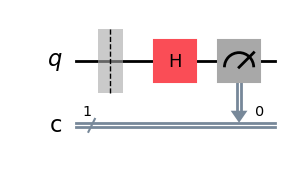

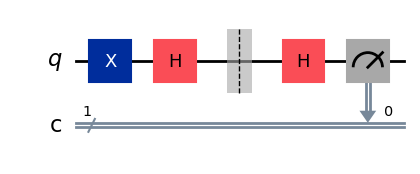

In [19]:
display(bb84_circuits[0].draw("mpl"))
display(bb84_circuits[1].draw("mpl"))

<a id="413-simulação"></a>
### 4.1.3 Simulação

Utilizando Qiskit Aer, criamos um simulador de circuitos quânticos padrão, que simula situações ideais sem a presença de erros quânticos ou interferência externa.

In [20]:
simulator = AerSimulator()

Então, podemos executar cada um dos circuitos com o simulador, salvando o resultado em uma lista.

Como esperado, quando as bases de Alice e Bob coincidem, a medição é igual ao bit original; quando são diferentes, obtemos um bit aleatório.

In [21]:
bob_bits = []

for qc in bb84_circuits:
    # Executa cada circuito uma única vez, pois é um processo determinístico
    job = simulator.run(qc, shots=1, memory=True)
    result = job.result()
    measurement = int("".join(result.get_memory()))
    bob_bits.append(measurement)

print(f"Bits de Bob:\t{np.array(bob_bits)}")

Bits de Bob:	[0 1 0 0 1 1 0 0]


Para determinar a chave filtrada, podemos comparar as bases escolhidas por Bob com as de Alice. 

Quando coincidirem, salvaremos o bit enviado/medido de mesmo índice na chave de cada um.

In [22]:
# Alice e Bob comparam as bases
alice_sifted_key = []
bob_sifted_key   = []

In [23]:
for i in range(NUM_BITS):
    if alice_bases[i] == bob_bases[i]:
        alice_sifted_key.append(int(alice_bits[i]))
        bob_sifted_key.append(int(bob_bits[i]))

Para melhorar a visualização dos resultados, podemos fazer outra lista com os índices de qubits nos quais as bases de ambos coincidem.

In [24]:
same_base_idx = [i for i, (b1, b2) in enumerate(zip(alice_bases, bob_bases)) if b1 == b2]

Com isso, o protocolo chega na etapa final, na qual Alice e Bob comparam suas bases e chaves, verificando a presença de um espião.

Por simplicidade, ambos utilizarão a *sifted key* completa para a verificação.

In [25]:
print("\n--- Pós-processamento ---")
print(f"Bases de Alice:\t{base_processing(alice_bases)}")
print(f"Bases de Bob:\t{base_processing(bob_bases)}")
print(f"Índices nos quais as bases coincidem:\t{same_base_idx}")

print(f"\nChave de Alice:\t{alice_sifted_key}")
print(f"Chave de Bob:\t{bob_sifted_key}")


--- Pós-processamento ---
Bases de Alice:	['+' 'x' '+' '+' '+' '+' 'x' '+']
Bases de Bob:	['x' 'x' 'x' '+' 'x' '+' 'x' 'x']
Índices nos quais as bases coincidem:	[1, 3, 5, 6]

Chave de Alice:	[1, 0, 1, 0]
Chave de Bob:	[1, 0, 1, 0]


In [26]:
# Verificação final
if alice_sifted_key == bob_sifted_key:
    final_key = "".join(map(str, alice_sifted_key))

    print(f"\nSUCESSO: As chaves são idênticas")
    print(f"Chave secreta final: {final_key}")
else:
    print('\nFALHA: As chaves são diferentes (suspeita de espião)')


SUCESSO: As chaves são idênticas
Chave secreta final: 1010


<a id="42-protocolo-com-espião"></a>
## 4.2 Protocolo com Espião

Para mostrar o que aconteceria caso a espiã Eve seja detectada, vamos repetir o código anterior introduzindo sua presença.

<a id="421-setup"></a>
### 4.2.1 Setup

O início do código permanece o mesmo: criamos uma sequência aleatória de bits a serem enviados por Alice, assim como suas bases de polarização e as bases de medição de Bob.

In [27]:
alice_bits  = np.random.randint(2, size=NUM_BITS)
alice_bases = np.random.randint(2, size=NUM_BITS)

bob_bases = np.random.randint(2, size=NUM_BITS)

In [28]:
print(f"Bits de Alice:\t{alice_bits}")
print(f"Bases de Alice:\t{base_processing(alice_bases)}")
print(f"Bases de Bob:\t{base_processing(bob_bases)}")

Bits de Alice:	[1 1 1 1 1 1 0 0]
Bases de Alice:	['x' 'x' 'x' '+' 'x' '+' '+' '+']
Bases de Bob:	['+' '+' 'x' 'x' 'x' 'x' 'x' '+']


<a id="422-ação-da-espiã"></a>
### 4.2.2 Ação da Espiã

Aqui introduzimos a primeira diferença: Eve intercepta a mensagem, criando suas bases próprias e medindo a mensagem de Alice.

No código, o procedimento é análogo ao feito anteriormente por Bob; criamos um circuito onde Alice envia qubits para Eve, que os mede.

In [29]:
eve_bases = np.random.randint(2, size=NUM_BITS)
print(f"Bases de Eve:\t{base_processing(eve_bases)}")

Bases de Eve:	['x' 'x' '+' 'x' '+' 'x' '+' 'x']


In [30]:
alice_eve_circuits = create_bb84_circuit(alice_bits, alice_bases, eve_bases)

In [31]:
eve_results = []

for qc in alice_eve_circuits:
    job = simulator.run(qc, shots=1, memory=True)
    result = job.result()
    measurement = int("".join(result.get_memory()))
    eve_results.append(measurement)

eve_results

[1, 1, 0, 0, 0, 1, 0, 1]

Agora que Eve mediu os qubits de Alice, ela deve reenviar a mensagem para Bob.

O procedimento em código é novamente similar ao de Alice: Eve codifica os bits medidos com suas bases e os envia para Bob, que mede novamente pensando que Alice os enviou.

In [32]:
eve_bob_circuits = create_bb84_circuit(eve_results, eve_bases, bob_bases)

bob_bits = []
for qc in eve_bob_circuits:
    job = simulator.run(qc, shots=1, memory=True)
    result = job.result()
    measurement = int("".join(result.get_memory()))
    bob_bits.append(measurement)

bob_bits

[0, 1, 1, 0, 1, 1, 1, 0]

<a id="423-detecção-da-espiã"></a>
### 4.2.3 Detecção da Espiã

Nessa etapa final, a presença de Eve é revelada.

Ao comparar as chaves filtradas, Alice e Bob detectam vários erros, causados pela medição de Eve. Após calcular o valor de $QBER$, os dois decidem que o ideal é abandonar a chave em questão.

In [33]:
alice_sifted_key = []
bob_sifted_key   = []

for i in range(NUM_BITS):
    if alice_bases[i] == bob_bases[i]:
        alice_sifted_key.append(int(alice_bits[i]))
        bob_sifted_key.append(bob_bits[i])

In [34]:
sifted_key_len = len(alice_sifted_key)

num_errors = 0
for i in range(sifted_key_len):
    if alice_sifted_key[i] != bob_sifted_key[i]:
        num_errors += 1

QBER = (num_errors / sifted_key_len) * 100

print("--- Simulação com Ataque de Eve ---")
print(f"Chave de Alice:\t{alice_sifted_key}")
print(f"Chave de Bob:\t{bob_sifted_key}")
print(f"Número de bits na chave: {sifted_key_len}")
print(f"Número de erros: {num_errors}")
print(f"Taxa de Erro de Bits (QBER): {QBER:.2f}%")

if QBER > 0:
    print("\nALERTA: Taxa de erros alta detectada! A comunicação pode ter sido interceptada.\n" +
          "A chave deve ser descartada.")
else:
    print("\nSUCESSO: Nenhuma espionagem detectada.")

--- Simulação com Ataque de Eve ---
Chave de Alice:	[1, 1, 0]
Chave de Bob:	[1, 1, 0]
Número de bits na chave: 3
Número de erros: 0
Taxa de Erro de Bits (QBER): 0.00%

SUCESSO: Nenhuma espionagem detectada.


Em uma situação mais realista, haveriam erros causados por interferência no circuito. Para refletir isso, poderíamos alterar o limiar de QBER para outro valor, como $10\%$ por exemplo.

Após esta etapa, o procedimento seria repetido inúmeras vezes, até que Alice e Bob consigam definir uma chave com $QBER$ baixo, momento no qual eles devem decidir a forma de criptografia clássica que usarão para se comunicar de fato.

<a id="5-conclusão"></a>
# 5. Conclusão

Neste relatório, foi explicado de forma sucinta conceitos de mecânica quântica, como superposição e entrelaçamento, a fim de introduzir o leitor à computação quântica. Além disso, uma breve introdução a algoritmos de criptografia clássica, como a Cifra de César, com um código no qual o leitor pode testar a criptografia e descriptografia simétrica, demonstrando o funcionamento da **chave** e explicando os problemas decorrentes de sua descoberta por terceiros.

Então, mostramos como o protocolo BB84 cria uma chave conjunta entre duas partes de forma segura. Após a conclusão do protocolo, é possível utilizar algoritmos clássicos para criptografar as mensagens, aumentando a segurança. O protocolo foi demonstrado na prática, etapa por etapa, para maior compreensão do leitor, de forma que consiga desenvolver o protocolo quântico BB84 e tenha total compreensão de seu funcionamento. Para tal, mostramos o protocolo de duas formas: sem a presença de uma espiã e com ela.

Desenvolvemos o protocolo em condições ideais. Análises mais profundas em condições não-ideais ou na criptografia da mensagem não foram abordadas neste relatório por fugirem do escopo do projeto.

Para aplicar o protocolo em situações reais, como em criptoanálise, é possível utilizá-lo em conjunto com códigos de correção de erro e amplificação de privacidade, como menciondo brevemente no notebook. 

Mesmo com as diferenças entre a simulação e situações reais, o protocolo se faz muito eficaz dentro do mundo da criptografia: algoritmos híbridos (protocolo de distribuição de chaves quântico com criptografia clássica) já são uma realidade. 

<a id="6-referências"></a>
# 6. Referências 

AREL, R. **Classical vs. quantum computing**: What are the differences. TechTarget, 2025. Disponível em: http://techtarget.com/searchdatacenter/tip/Classical-vs-quantum-computing-What-are-the-differences. Acesso em: 07 nov. 2025.

BADMAN,  Annie; KOSINSKI, Matthew. **O que é criptografia simétrica?**. IBM, 2024. Disponível em: <a href='https://www.ibm.com/br-pt/think/topics/symmetric-encryption' target='_blank'>https://www.ibm.com/br-pt/think/topics/symmetric-encryption</a>. Acesso em: 07 nov. 2025. 

BENNETT, C. H.; BRASSARD, G. **Quantum cryptography**: Public key distribution and coin tossing. In: Proceedings of IEEE International Conference on Computers, Systems and Signal Processing. 1984.

Cifra de César. **Wikipedia**, 2025. Disponível em: <a href='https://pt.wikipedia.org/wiki/Cifra_de_C%C3%A9sar' target='_blank'>https://pt.wikipedia.org/wiki/Cifra_de_C%C3%A9sar</a>. Acesso em: 07 nov. 2025. 

Classical vs. quantum computing: What are the differences. **TechTarget**. Disponível em: <a href='http://techtarget.com/searchdatacenter/tip/Classical-vs-quantum-computing-What-are-the-differences' target='_blank'>http://techtarget.com/searchdatacenter/tip/Classical-vs-quantum-computing-What-are-the-differences</a>. Acesso em: 07 nov. 2025.

GISIN, N.; RIBORDY, G.; TITTEL, W.; ZBINDEN, H. **Quantum cryptography**. Reviews of Modern Physics. 2024.

GRIFFITHS, D. J. **Introduction to Quantum Mechanics**. 2nd ed. Cambridge: Cambridge University Press, 2017.

MARQUEZINO, F.L.;  HELAYËL-NETO,  J.A. **Estudo Introdutório do Protocolo Quântico BB84: para Troca Segura de Chaves**. Rio de Janeiro: Centro Brasileiro de Pesquisas Físicas, 2022. 

MAZO, P. L. **O Gato de Schrödinger**. IFSC-USP, 2018. Disponível em: <a href='https://www.ifsc.usp.br/~strontium/Teaching/Material2018-2%20SFI5707%20MecanicaquanticaB/Monografia%20-%20Pedro%20-%20SchroedingerCat.pdf' target='_blank'>https://www.ifsc.usp.br/~strontium/Teaching/Material2018-2%20SFI5707%20MecanicaquanticaB/Monografia%20-%20Pedro%20-%20SchroedingerCat.pdf</a>. Acesso em: 07 nov. 2025.

NIELSEN, M. A.; CHUANG, I. L. **Quantum Computation and Quantum Information**. 10th anniversary ed. Cambridge: Cambridge University Press, 2010.

PANTAROTTO, Giovanni Deltreggia . **SIMULAÇÃO DA APLICAÇÃO DO PROTOCOLO QUÂNTICO BB84**. São Paulo: FATEC, 2020. 

Schneider, J.; Smalley, I. **O que é computação quântica?**. IBM. Disponível em: <a href='http://ibm.com/br-pt/think/topics/quantum-computing' target='_blank'>http://ibm.com/br-pt/think/topics/quantum-computing</a>. Acesso em: 07 nov. 2025.

WATROUS, J. **Understanding Quantum Information and Computation**. arXiv, 2025. DOI: 10.48550/arXiv.2507.11536. Disponível em: https://arxiv.org/abs/2507.11536. Acesso em: 08 set. 2025.

What Is the Spooky Science of Quantum Entanglement?. **NASA Science**, 2025. Disponível em: <a href='https://science.nasa.gov/what-is-the-spooky-science-of-quantum-entanglement/' target='_blank'>https://science.nasa.gov/what-is-the-spooky-science-of-quantum-entanglement/</a>. Acesso em: 07 nov. 2025.